# Deep Learning Model 

First Deep Learning model. The goal is to train a model that i can later apply for other projects. 

Dataset is Watkins Marine Mammal dataset.

The goal of the model is ...

---



## Setting up

In [1]:
#!pip install pandas numpy matplotlib soundfile seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import soundfile as sf
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
ROOT_PATH = Path("../../..")  

AUDIO_DIR = ROOT_PATH / "Watkins Data Training" / "Data" / "Audio"
ANNOT_DIR = ROOT_PATH / "Bens-Internship-2025" / "Watkins Marine deep learning model" / "Data" / "Annotations"

print("AUDIO_DIR exists:", AUDIO_DIR.exists())
print("ANNOT_DIR exists:", ANNOT_DIR.exists())

AUDIO_DIR exists: True
ANNOT_DIR exists: True


**basic CSV** idk if needed yet

In [5]:
ANNOT_FILE = ANNOT_DIR / "audio_annotations.csv"

records = []

# Loop thru all audio files
for cat in AUDIO_DIR.iterdir():
    if not cat.is_dir():
        continue
    for audio_file in cat.rglob("*.wav"):
        try:
            info = sf.info(audio_file)
            duration = info.frames / info.samplerate
            if duration > 0:  # only add positive durations
                records.append({
                    "category": cat.name,
                    "filename": audio_file.name,
                    "duration_sec": duration,
                    "sample_rate": info.samplerate
                })
            else:
                print(f"Skipping zero-duration file: {audio_file}")
        except Exception as e:
            print(f"Error reading {audio_file}: {e}")


df = pd.DataFrame(records)
df.to_csv(ANNOT_FILE, index=False)

print("Total files processed:", len(df))

df

Total files processed: 15407


,category,filename,duration_sec,sample_rate
0,AtlanticSpottedDolphin,61025001.wav,3.527995,43900
1,AtlanticSpottedDolphin,61025002.wav,3.527995,43900
2,AtlanticSpottedDolphin,61025003.wav,3.527995,43900
3,AtlanticSpottedDolphin,61025004.wav,1.763986,43900
4,AtlanticSpottedDolphin,61025005.wav,1.323007,43900
...,...,...,...,...
15402,White_sidedDolphin,7900400D.wav,3.720432,148100
15403,White_sidedDolphin,7900400F.wav,6.340358,148100
15404,White_sidedDolphin,7900400H.wav,3.968224,148100
15405,White_sidedDolphin,7900400I.wav,2.358690,148100


testing ai in code

Shape: (15407, 4)

Dtypes:
category         object
filename         object
duration_sec    float64
sample_rate       int64
dtype: object

Duration stats (s):
count    15407.000000
mean         6.048923
std         36.563913
min          0.016732
25%          1.132450
50%          1.847100
75%          2.935460
max       1455.931678
Name: duration_sec, dtype: float64

Sample rate counts:
sample_rate
21900     1941
80000     1643
166600    1543
81920     1398
81600     1249
40000     1076
60600      768
10000      701
14900      572
148100     519
20000      361
47600      360
30000      349
10240      342
45400      340
600        277
640        258
20480      188
43900      185
192000     179
Name: count, dtype: int64

Top 20 categories by file count:
category
KillerWhale                        2647
SpermWhale                         1296
Long_FinnedPilotWhale              1213
PantropicalSpottedDolphin          1034
CommonDolphin                       884
White_beakedDolphin          

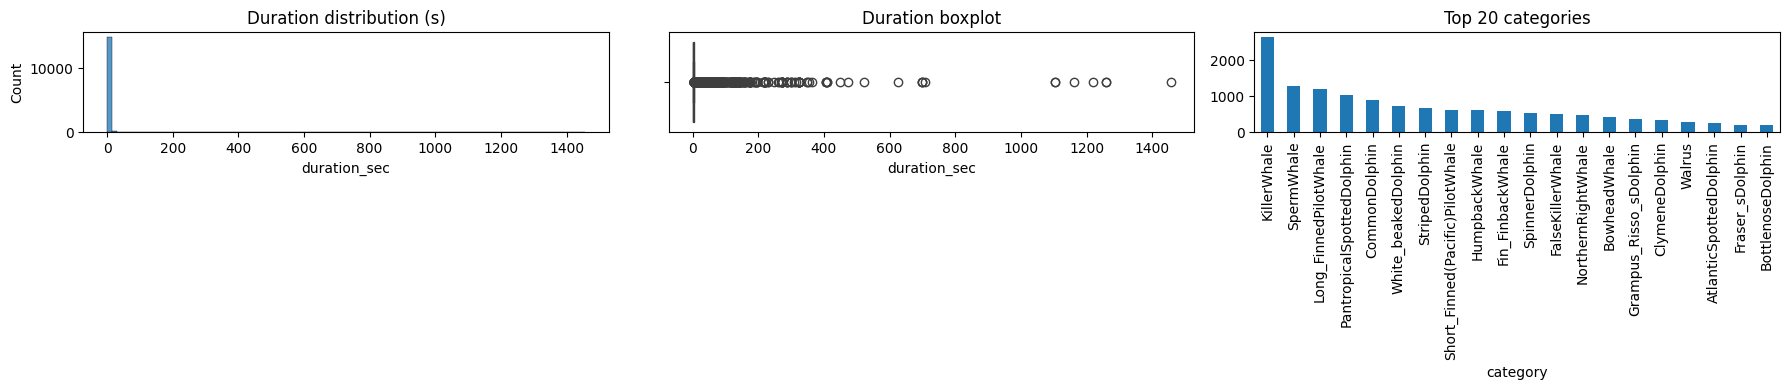

Longest files:


,category,filename,duration_sec,sample_rate
12427,SpermWhale,9004600V.wav,1455.931678,44100
11071,Short_Finned(Pacific)PilotWhale,8401600B.wav,1260.000000,44100
12050,SpermWhale,8401600B.wav,1260.000000,44100
12729,SpermWhale,9400500C.wav,1220.100680,44100
11742,SpermWhale,7200900P.wav,1162.098299,44100
3446,Fin_FinbackWhale,78014001.wav,1104.000000,640
3447,Fin_FinbackWhale,78014002.wav,1104.000000,640
4412,HumpbackWhale,6301901L.wav,709.056779,14900
12384,SpermWhale,90011001.wav,698.684000,160000
12385,SpermWhale,90011002.wav,698.683975,40000



Shortest files:


,category,filename,duration_sec,sample_rate
2406,Dall_sPorpoise,7902400W.wav,0.016732,148100
2410,Dall_sPorpoise,79024010.wav,0.018001,148100
2405,Dall_sPorpoise,7902400V.wav,0.018008,148100
2399,Dall_sPorpoise,7902400P.wav,0.019001,148100
2403,Dall_sPorpoise,7902400T.wav,0.019710,148100
12008,SpermWhale,8301901A.wav,0.019885,81920
2417,Dall_sPorpoise,79024017.wav,0.020155,148100
2416,Dall_sPorpoise,79024016.wav,0.020385,148100
2407,Dall_sPorpoise,7902400X.wav,0.021128,148100
11999,SpermWhale,83019011.wav,0.021533,81920


Selected: {'category': 'White_sidedDolphin', 'filename': '78007039.wav', 'duration_sec': 3.3534098582039165, 'sample_rate': 148100}
..\..\..\Watkins Data Training\Data\Audio\White_sidedDolphin\78007039.wav
samplerate: 148100 Hz
channels: 1
duration: 3.353 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]


{'KillerWhale': 0.13228526290483222, 'SpermWhale': 0.2701844837261504, 'Long_FinnedPilotWhale': 0.28867196282695046, 'PantropicalSpottedDolphin': 0.3386451556180763, 'CommonDolphin': 0.3961075689016865, 'White_beakedDolphin': 0.4897329942784488, 'StripedDolphin': 0.5141836870911761, 'Short_Finned(Pacific)PilotWhale': 0.5656851226318108, 'HumpbackWhale': 0.5797335942203492, 'Fin_FinbackWhale': 0.6006159363792297}


In [9]:
from IPython.display import Audio, display
import random

# Exploration helpers for the annotations + quick audio playback (run this cell)

def explore_annotations(df, top_n=20):
    print("Shape:", df.shape)
    print("\nDtypes:")
    print(df.dtypes)
    print("\nDuration stats (s):")
    print(df['duration_sec'].describe())
    print("\nSample rate counts:")
    print(df['sample_rate'].value_counts().head(20))
    print(f"\nTop {top_n} categories by file count:")
    print(df['category'].value_counts().head(top_n))
    # Plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df['duration_sec'], bins=100, ax=axes[0])
    axes[0].set_title('Duration distribution (s)')
    sns.boxplot(x=df['duration_sec'], ax=axes[1])
    axes[1].set_title('Duration boxplot')
    df['category'].value_counts().head(top_n).plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Top {top_n} categories')
    plt.tight_layout()
    plt.show()

def show_long_short(df, n=10):
    print("Longest files:")
    display(df.nlargest(n, 'duration_sec'))
    print("\nShortest files:")
    display(df.nsmallest(n, 'duration_sec'))

def play_random_sample(df, category=None, seed=None):
    """Play a random sample (optionally from a specific category)."""
    if seed is not None:
        random.seed(seed)
    sub = df if category is None else df[df['category'] == category]
    if sub.empty:
        print("No samples found for category:", category)
        return None
    row = sub.sample(1).iloc[0]
    audio_path = AUDIO_DIR / row['category'] / row['filename']
    print("Selected:", row.to_dict())
    try:
        info = sf.info(audio_path)
        print(info)
    except Exception as e:
        print("Could not read file info:", e)
    display(Audio(str(audio_path)))
    return row

def compute_simple_class_weights(df):
    """Return simple inverse-frequency class weights (not sklearn-formatted)."""
    counts = df['category'].value_counts()
    total = len(df)
    weights = (total / (counts * len(counts))).to_dict()
    return weights

# Example usage (uncomment to run):
explore_annotations(df)
show_long_short(df)
play_random_sample(df, category='White_sidedDolphin', seed=1)

# compute weights before using them
weights = compute_simple_class_weights(df)
print({k: weights[k] for k in list(weights)[:10]})